In [12]:
import Constant
import utils
import os.path
import pandas as pd
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

#-------- 画图设置
# 处理中文乱码
# import matplotlib.font_manager
# matplotlib.font_manager.list_fonts

# plt.title('搞定')
# plt.show()
plt.ion()
plt.rcParams["font.sans-serif"]=['simhei','Times New Roman']
# 英文字体
plt.rcParams["font.family"]=['Times New Roman']
plt.rcParams["font.size"]=16
plt.rcParams["axes.unicode_minus"]=False

In [13]:
#-------- 地址信息设置
addrSetFilePath = Constant.addressPath
outTxSetFilePath = Constant.addressOuterTxPath
#0.1ETH pennybags.eth
aExp1 = '0x4026b3da349c2952255ca9db4f055ea57f4e037c'
v1 = '0.1ETH'
#0.1ETH sifu.eth
aExp2='0x5dd596c901987a2b28c38a9c1dfbf86fffc15d77'
v2 = '0.1ETH'
#kaijuking779.eth
aExp3 = '0xa1efa0adecb7f5691605899d13285928ae025844'
v3 = '0.1ETH'

# snxwallet.eth
aExp4='0xcde4d4fa46fe2878c6b0530c9b9ac9ab87a38039'
v4 = '10ETH'

#nordstream2.eth
aExp5='0x770c13284eb073f07d7c88fb787c319d533f785a'
v5 = '10ETH'
#yieldboss.eth
aExp6='0x9ee1873ba8383b1d4ac459abd3c9c006eaa8800a'
v6='10ETH'

#satansp
aExp7='0x7d1d951a65ad6e1e9e1390c77273e642a540526f'
v7='100ETH'

#headlesswizard.eth
aExp8='0x17bc9268f8abb454f0c7ae4d76d969a37235480d'
v8='100ETH'

#north.korea
aExp9='0xb88194f9bcc5ec80cf80c163ca2b123917468793'
v9='100ETH'

In [19]:
addr = aExp6
value = v6
token = False

In [23]:

# 获取地址的外部交易
if token:
    tt = pd.DataFrame()
else:
    nt = pd.DataFrame()
    it = pd.DataFrame()

# 将地址的外部交易找出来，
for file_dir in os.listdir(outTxSetFilePath):
    if value in file_dir:
        data = utils.readPklFile(outTxSetFilePath + file_dir)
        data = data.loc[(data['from'] == addr) | (data['to'] == addr)]
        if data.shape[0] == 0:
            continue
        if token:
            if 'Token' in file_dir:
                addData = [tt, data]
                tt = pd.concat(addData)
        else:
            if 'Normal' in file_dir:
                addData = [nt, data]
                nt = pd.concat(addData)
            if 'Internal' in file_dir:
                addData = [it, data]
                it = pd.concat(addData)
# 去除重复交易
if token:
    txdf = tt.drop_duplicates(subset=['hash'])
    
else:
    txdf = nt.drop_duplicates(subset=['hash'])



addr: 0x9ee1873ba8383b1d4ac459abd3c9c006eaa8800a  OutTx:  1099 ( 10ETH )


C:\Users\Tangy\AppData\Local\Temp\ipykernel_22124\611829452.py:10: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  txdf['date'] = pd.to_datetime(txdf['timeStamp'],unit='s', utc=True)


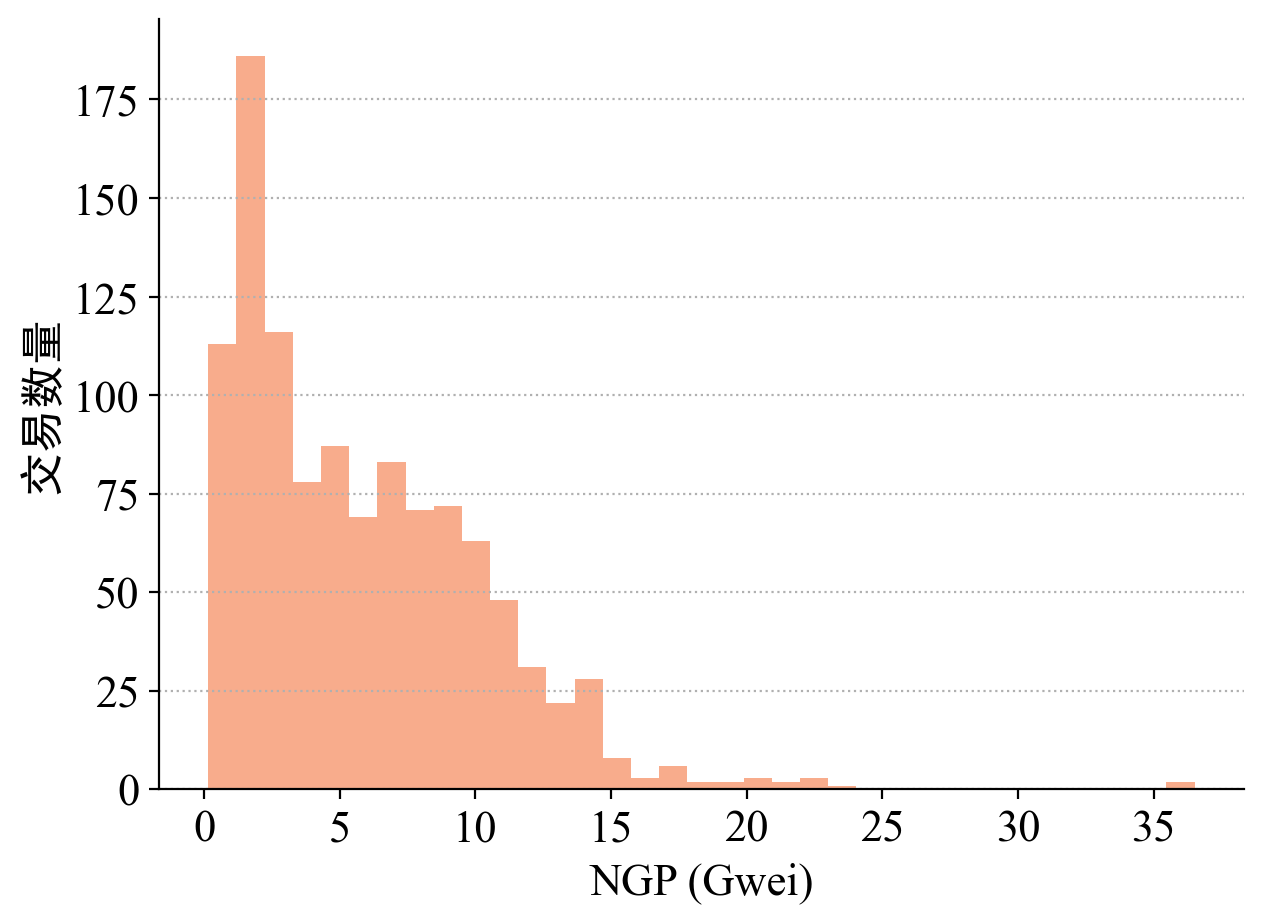

In [24]:
#交易手续费Gas Price单位（GWei）
#每天的交易数量
txNet = pd.read_csv('Dataset/txPerSecond.tsv', sep='\t')
txNet.columns=['date','txnum']
txdf['gasPrice'] = txdf['gasPrice'].str.slice(stop=-9) + '.' + txdf['gasPrice'].str.slice(start=-9)
txdf.gasPrice = txdf.gasPrice.astype('float64')
#输出该地址有多少交易量
print("addr:",addr," OutTx: ",txdf.shape[0],"(",value,")")
#将timestamp转换成datatime
txdf['date'] = pd.to_datetime(txdf['timeStamp'],unit='s', utc=True)
txdf['date'] = txdf['date'].apply(lambda x: x.strftime('%d.%m.%Y'))
#交易Gas Limit:
txdf.gas = txdf.gas.astype('Int64')
def calc(gasPrice, date, txNet):
    txnum = txNet.loc[txNet['date'] == date, 'txnum']
    return gasPrice / txnum.values[0]
# 归一化
txdf['normalGasPrice'] = txdf.apply(lambda x: calc(x['gasPrice'],x['date'],txNet),axis=1)

# fig, ax = figSetting()
plt.figure(dpi=200,figsize=(7,5))
color = '#f8ac8c'
bins = 35 
alpha = 1
txdf.normalGasPrice.plot(kind='hist',bins = bins, alpha=alpha, color=color)

plt.ylabel('交易数量',fontfamily='sans-serif')
plt.xlabel('NGP (Gwei)')
plt.grid(axis='y',linestyle=':')
ax = plt.gca()
# ax.set_yticks(np.arange(0,21,2),labels=np.arange(0,21,2))
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)

plt.show()
# print(addr, ": ", txdf.normalGasPrice.mean(),"(mean) ",txdf.normalGasPrice.median(),"(mid) ",txdf.normalGasPrice.min(), "(min) ",txdf.normalGasPrice.max(),"(max)")
# print(txNet.dtypes)
# print(txdf.dtypes)
  

C:\Users\Tangy\AppData\Local\Temp\ipykernel_22124\3768332430.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  txdf['datetime'] = pd.to_datetime(txdf['timeStamp'],unit='s',utc=True)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
no insert


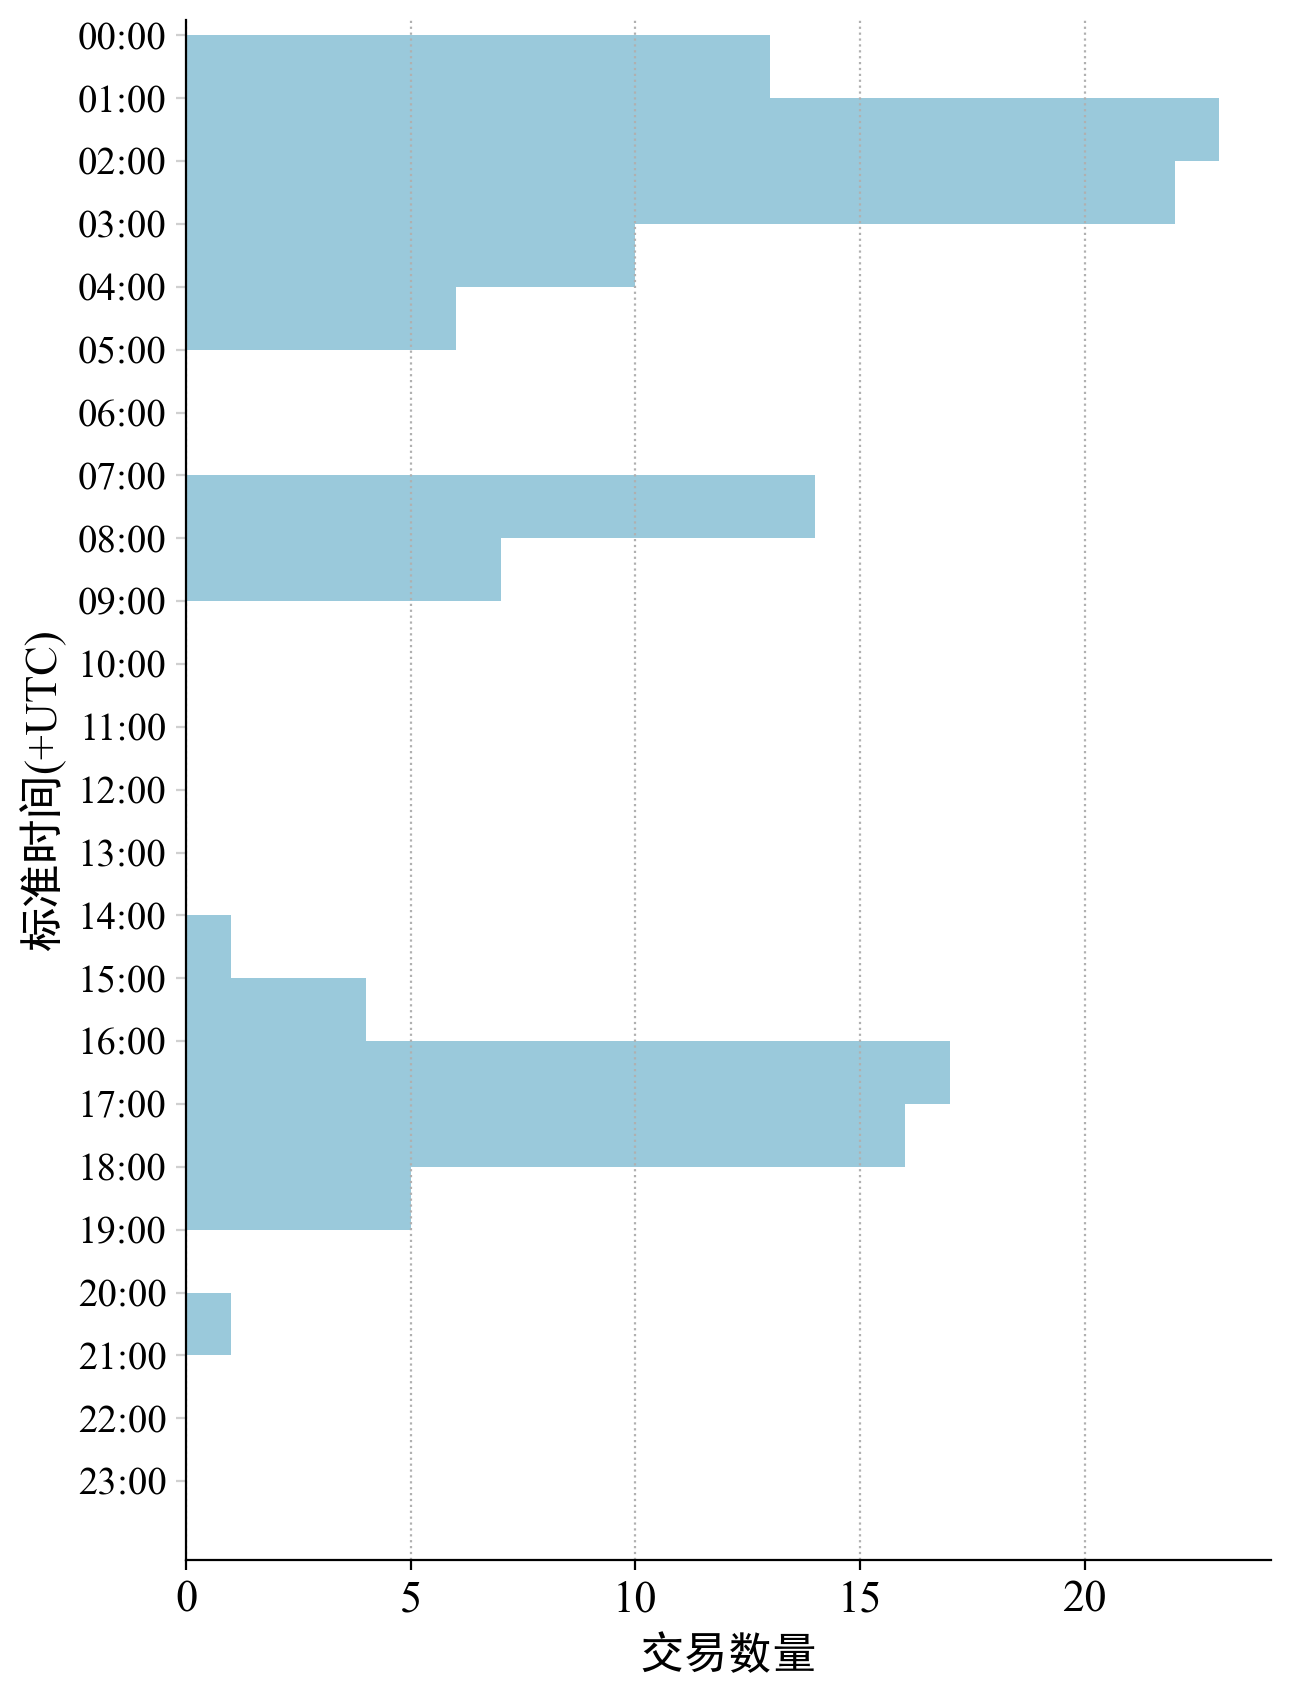

addr: 0x7d1d951a65ad6e1e9e1390c77273e642a540526f  OutTx:  139 ( 100ETH )


In [17]:
#活跃时间
txdf['datetime'] = pd.to_datetime(txdf['timeStamp'],unit='s',utc=True)
cnt = txdf.groupby(pd.Grouper(key='datetime',freq='H')).size().reset_index(name='count')
time = cnt['datetime'].apply(lambda x: x.strftime('%H'))
time = time.astype(int)
time.name='t'
cnt = pd.concat([cnt,time],axis=1)
cnt = cnt.groupby(by=['t'])['count'].sum().reset_index()
plt.figure(dpi=200,figsize=(7,10))
width = 1
color = '#9ac9db'
align = 'edge'

yIndex = np.arange(0, 24, 1)
print(yIndex)
if(cnt.shape[0] ==yIndex.size):
    print("no insert")
    cnt['t'] = cnt['t'].apply(lambda x: str(x).zfill(2)+':00')
    cnt = cnt.set_index('t')
    cnt['count'].plot.barh(color=color,width=width,align=align)
# cnt['count'].plot(ax=ax, kind='hist',bins = 35,alpha=1,color='#f8ac8c')
else:
    print("insert: ")
    for i, row in cnt.iterrows():
        if(row.name == i):
            continue
        else:
            print(i," ")
            df1 = cnt.iloc[:i,:]
            df2 = cnt.iloc[i:,:]
            add = {i, 0}
            cnt = pd.concat([df1,add,df2])
    cnt['t'] = cnt['t'].apply(lambda x: str(x).zfill(2)+':00')
    cnt = cnt.set_index('t')
    cnt['count'].plot.barh(color=color,width=width,align=align)
# print(cnt)
plt.xlabel('交易数量',fontfamily='sans-serif',)
plt.ylabel('标准时间(+UTC)',fontfamily=['Times New Roman','simhei'])
plt.grid(axis='x',linestyle=':')
ax = plt.gca()
# 翻转y轴
ax.invert_yaxis()
ax.tick_params("y",which="major",color='#d0d0d0',labelsize=14)


#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)
# ax.set_yticks(np.arange(0,21,2),labels=np.arange(0,21,2))

plt.show()

print("addr:",addr," OutTx: ",txdf.shape[0],"(",value,")")

addr: 0x7d1d951a65ad6e1e9e1390c77273e642a540526f  OutTx:  139 ( 100ETH )


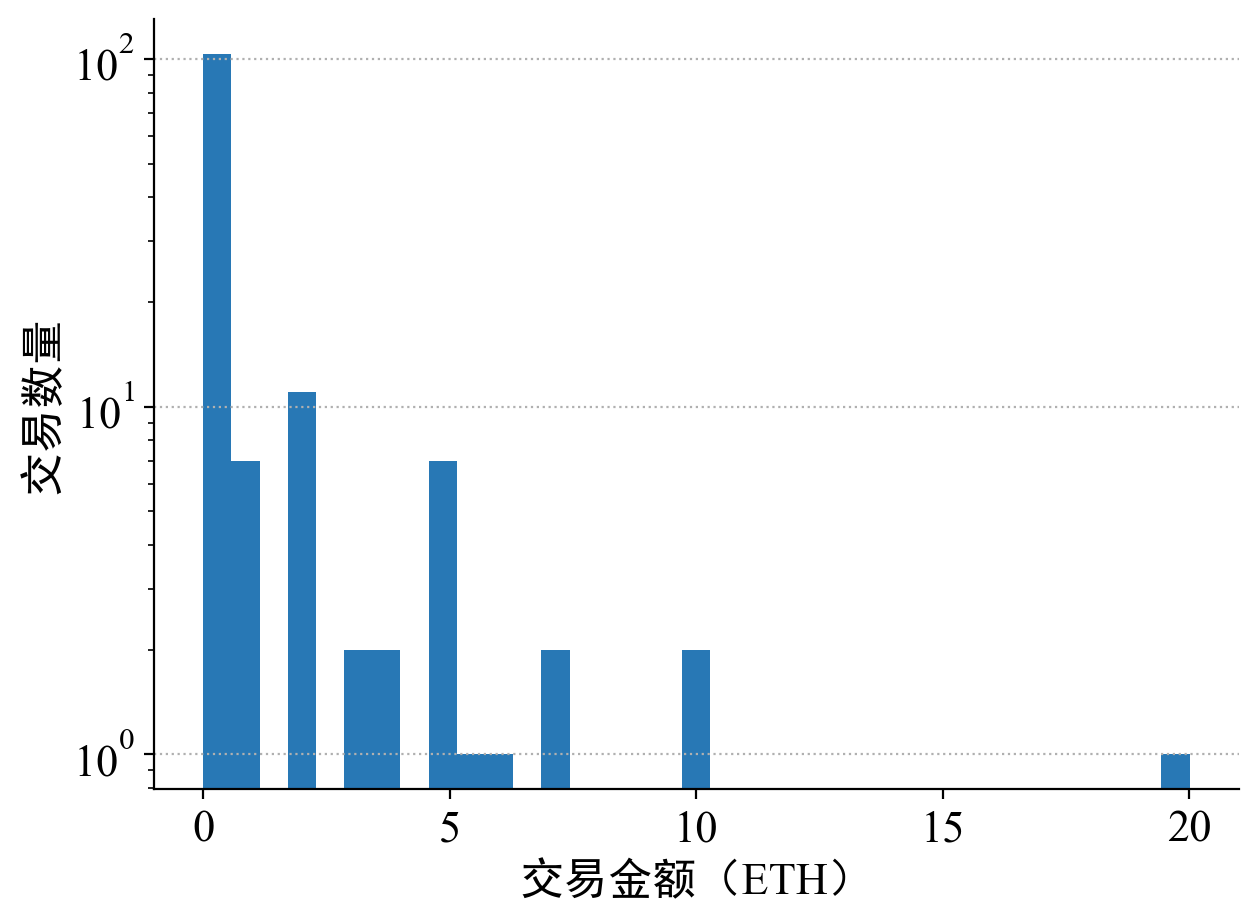

In [18]:
# 计算交易金额
# 单位wei转换成ETH
txdf['value'] = txdf['value'].str.slice(stop=-18) + '.' + txdf['value'].str.slice(start=-18)
print("addr:",addr," OutTx: ",txdf.shape[0],"(",value,")")
# 字符串类类型转换
txdf.value = txdf.value.astype('float64')

#直方图绘制
plt.figure(dpi=200,figsize=(7,5))
color = '#2878b5'
bins = 35 
alpha = 1
ax = plt.gca()
ax.set_yscale('log')

txdf.value.plot(kind='hist', bins = 35, color = '#2878b5')
plt.ylabel('交易数量',fontfamily='sans-serif')
plt.xlabel('交易金额（ETH）',fontfamily=['Times New Roman','simhei'])
plt.grid(axis='y',linestyle=':')
# plt.hist(txdf.value,bins=100)
#边框不可见
ax.spines.right.set_visible(False) 
ax.spines.top.set_visible(False)

# txdf.hist('value',color = '#2878b5', bins = 50)
plt.show()

# #中位数
# vmid = txdf.value.median()

# #平均数
# vavg = txdf.value.mean()

# #标准差
# vstd = txdf.value.std()

# #最小最大
# vmin = txdf.value.min()
# vmax = txdf.value.max()

# print("tx value min:", vmin," max:",vmax," mid:",vmid," avg:",vavg," std:",vstd)